<a href="https://colab.research.google.com/github/faizankhann1126/document-analyzer-using-Deeplearning/blob/main/DAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

In [ ]:
base_dir = '/content/drive/MyDrive/owndata/'
train_dir = os.path.join(base_dir, '')
#validation_dir = os.path.join(base_dir, 'validation')

train_10_dir = os.path.join(train_dir, '10th')
train_12_dir = os.path.join(train_dir, '12th')
train_adhar_dir = os.path.join(train_dir, 'Aadhar card')
train_income_dir = os.path.join(train_dir, 'Income')

In [ ]:
print('total training 10th images:', len(os.listdir(train_10_dir)))
print('total training 12th images:', len(os.listdir(train_12_dir)))
print('total validation Aadhar card images:', len(os.listdir(train_adhar_dir)))
print('total validation Income images:', len(os.listdir(train_income_dir)))

total training 10th images: 9
total training 12th images: 8
total validation Aadhar card images: 17
total validation Income images: 7


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
img=plt.imread("/content/drive/MyDrive/owndata/10th/010001.jpg")
print(img.shape)

(2338, 1654, 3)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(5, activation='softmax')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='CategoricalCrossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150)
        )

Found 51 images belonging to 5 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
2/2 [==============================] - 10s 207ms/step - loss: 6.6820 - acc: 0.2549
Epoch 2/100
2/2 [==============================] - 1s 480ms/step - loss: 5.8464 - acc: 0.1961
Epoch 3/100
2/2 [==============================] - 2s 853ms/step - loss: 1.8380 - acc: 0.2745
Epoch 4/100
2/2 [==============================] - 1s 587ms/step - loss: 1.5804 - acc: 0.2353
Epoch 5/100
2/2 [==============================] - 1s 613ms/step - loss: 1.5114 - acc: 0.4510
Epoch 6/100
2/2 [==============================] - 1s 980ms/step - loss: 1.3937 - acc: 0.3333
Epoch 7/100
2/2 [==============================] - 1s 693ms/step - loss: 1.2580 - acc: 0.6863
Epoch 8/100
2/2 [==============================] - 1s 498ms/step - loss: 1.5680 - acc: 0.3333
Epoch 9/100
2/2 [==============================] - 1s 931ms/step - loss: 1.5751 - acc: 0.3529
Epoch 10/100
2/2 [==============================] - 2s 965ms/step - loss: 0.9199 - acc: 0.8431
Epoch 11/100
2/2 [==============================] - 2s 890

Text(0.5, 1.0, 'Training loss')

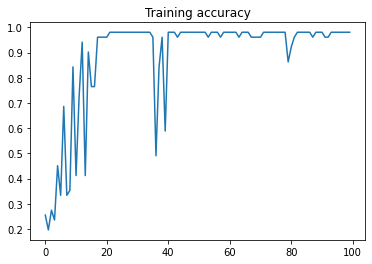

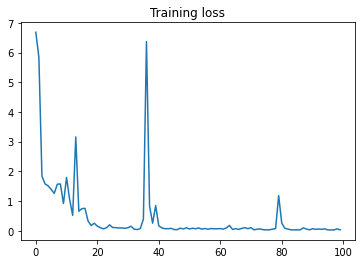

In [ ]:

acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.title('Training accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.title('Training loss')

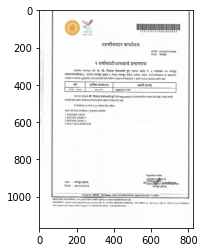

In [ ]:
img=plt.imread("/content/drive/MyDrive/owndata/Income/010062.jpg")
plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#load the image
my_image = load_img('/content/drive/MyDrive/owndata/Income/010062.jpg', target_size=(150, 150))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)

#make the prediction
prediction = model.predict(my_image)
prediction =np.argmax(prediction)

if prediction ==0:
  print("This is a 10th Marksheet")
elif prediction ==1:
  print("This is a 12th Marksheet")
elif prediction ==2:
  print("This is a Aadhar Card")
elif prediction ==3:
  print("This is a Income Certificate")
elif prediction ==4:
  print("This is a TC") 

1/1 [==============================] - 0s 170ms/step
This is a Income Certificate
